In [1]:


import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats


import jdatetime


import geopandas as gpd
from shapely.geometry import Point


import warnings
warnings.filterwarnings("ignore")


In [2]:
Drive_df=pd.read_csv("Divar.csv")

/var/folders/l1/pklr4qxn6hq3qpmf7nfxf37h0000gn/T/ipykernel_1314/1387778876.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  Drive_df=pd.read_csv("Divar.csv")


In [5]:
Drive_df.head()

Unnamed: 0         cat2_slug       cat3_slug city_slug neighborhood_slug  \
0           0    temporary-rent           villa     karaj         mehrshahr   
1           1  residential-sell  apartment-sell    tehran           gholhak   
2           2  residential-rent  apartment-rent    tehran             tohid   
3           3   commercial-rent     office-rent    tehran          elahiyeh   
4           4  residential-sell  apartment-sell   mashhad          emamreza   

      created_at_month    user_type  \
0  2024-08-01 00:00:00  مشاور املاک   
1  2024-05-01 00:00:00  مشاور املاک   
2  2024-10-01 00:00:00          NaN   
3  2024-06-01 00:00:00          NaN   
4  2024-05-01 00:00:00  مشاور املاک   

                                         description  \
0  ۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...   
1  دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...   
2                                    تخلیه پایان ماه   
3  فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...   
4  هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...   

                                              title rent_mode  ...  \
0  باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه       NaN  ...   
1                           ۶۰ متر قلهک فول امکانات       NaN  ...   
2                          آپارتمان ۳ خوابه ۱۳۲ متر     مقطوع  ...   
3           فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری     مقطوع  ...   
4                  ۱۱۵ متری/شمالی رو به آفتاب/اکبری       NaN  ...   

   property_type regular_person_capacity extra_person_capacity  \
0            NaN                     4.0                     6   
1            NaN                     NaN                   NaN   
2            NaN                     NaN                   NaN   
3            NaN                     NaN                   NaN   
4            NaN                     NaN                   NaN   

  cost_per_extra_person  rent_price_on_regular_days  \
0              350000.0                   1500000.0   
1                   NaN                         NaN   
2                   NaN                         NaN   
3                   NaN                         NaN   
4                   NaN                         NaN   

  rent_price_on_special_days  rent_price_at_weekends location_latitude  \
0               3.500000e+09               3500000.0         35.811684   
1                        NaN                     NaN               NaN   
2                        NaN                     NaN         35.703865   
3                        NaN                     NaN               NaN   
4                        NaN                     NaN               NaN   

  location_longitude  location_radius  
0          50.936600            500.0  
1                NaN            500.0  
2          51.373459              NaN  
3                NaN              NaN  
4                NaN              NaN  

[5 rows x 61 columns]

In [3]:

warnings.filterwarnings('ignore')


plt.rcParams['font.family'] = 'DejaVu Sans'

# Display basic information about the dataset
print("Dataset Shape:", Drive_df.shape)
print("\nColumn Names:")
print(Drive_df.columns.tolist())

    

Dataset Shape: (1000000, 61)

Column Names:
['Unnamed: 0', 'cat2_slug', 'cat3_slug', 'city_slug', 'neighborhood_slug', 'created_at_month', 'user_type', 'description', 'title', 'rent_mode', 'rent_value', 'rent_to_single', 'rent_type', 'price_mode', 'price_value', 'credit_mode', 'credit_value', 'rent_credit_transform', 'transformable_price', 'transformable_credit', 'transformed_credit', 'transformable_rent', 'transformed_rent', 'land_size', 'building_size', 'deed_type', 'has_business_deed', 'floor', 'rooms_count', 'total_floors_count', 'unit_per_floor', 'has_balcony', 'has_elevator', 'has_warehouse', 'has_parking', 'construction_year', 'is_rebuilt', 'has_water', 'has_warm_water_provider', 'has_electricity', 'has_gas', 'has_heating_system', 'has_cooling_system', 'has_restroom', 'has_security_guard', 'has_barbecue', 'building_direction', 'has_pool', 'has_jacuzzi', 'has_sauna', 'floor_material', 'property_type', 'regular_person_capacity', 'extra_person_capacity', 'cost_per_extra_person', 'r

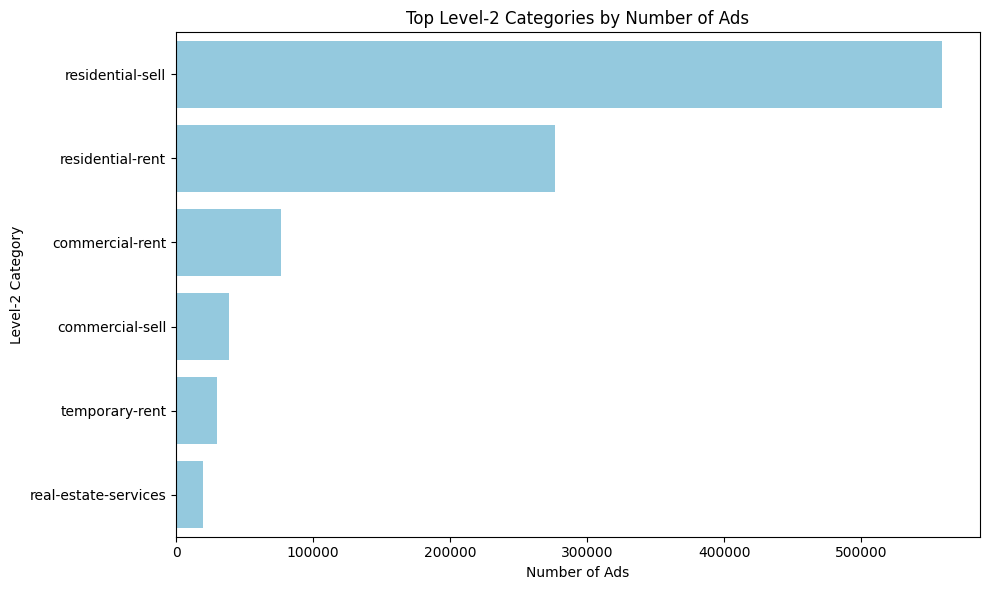

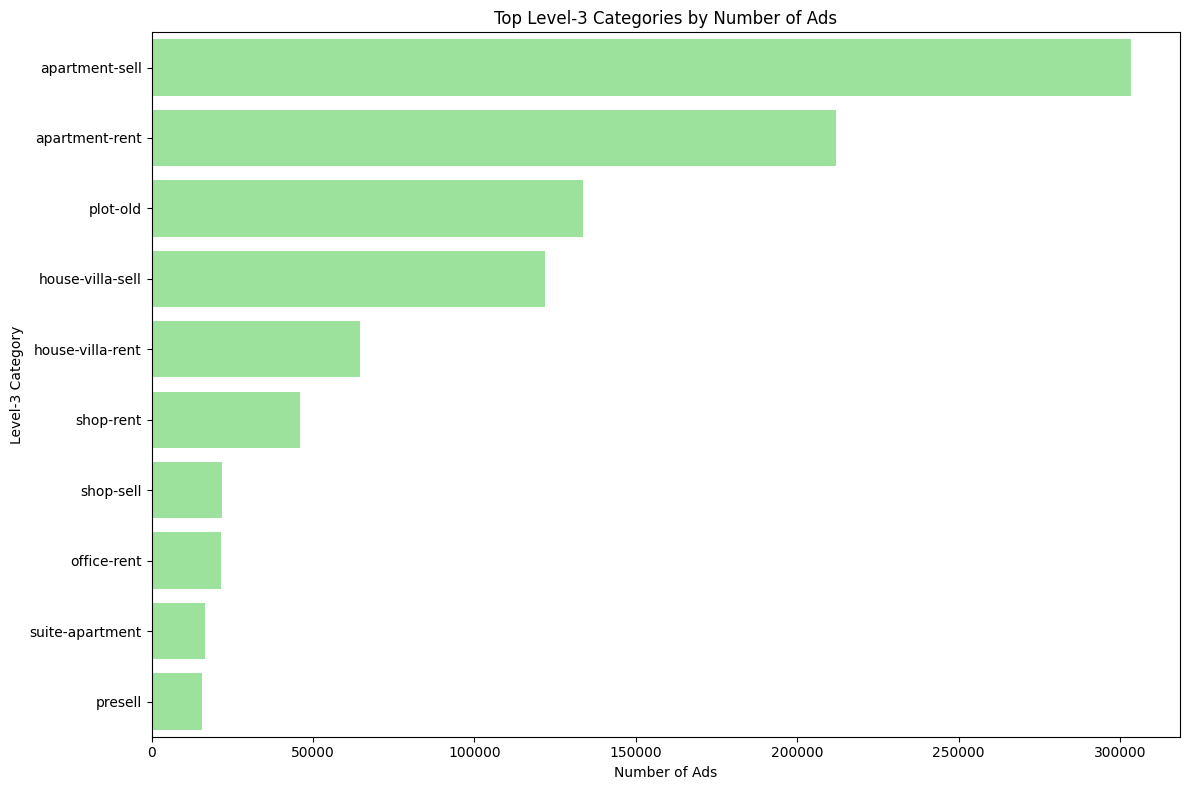

In [7]:

#1
df = Drive_df.copy()
df = df.dropna(subset=['cat2_slug','cat3_slug'])
lvl2 = df['cat2_slug'].astype(str)
lvl3 = df['cat3_slug'].astype(str)

count_lvl2 = lvl2.value_counts().reset_index()
count_lvl2.columns = ['cat2_slug','count']
count_lvl3 = lvl3.value_counts().reset_index()
count_lvl3.columns = ['cat3_slug','count']

top_n2 = count_lvl2
plt.figure(figsize=(10,6))
sns.barplot(data=top_n2, x='count', y='cat2_slug', color='skyblue')
plt.title('Top Level-2 Categories by Number of Ads')
plt.xlabel('Number of Ads')
plt.ylabel('Level-2 Category')
plt.tight_layout()
plt.show()

top_n3 = count_lvl3.head(10)
plt.figure(figsize=(12,8))
sns.barplot(data=top_n3, x='count', y='cat3_slug', color='lightgreen')
plt.title('Top Level-3 Categories by Number of Ads')
plt.xlabel('Number of Ads')
plt.ylabel('Level-3 Category')
plt.tight_layout()
plt.show()


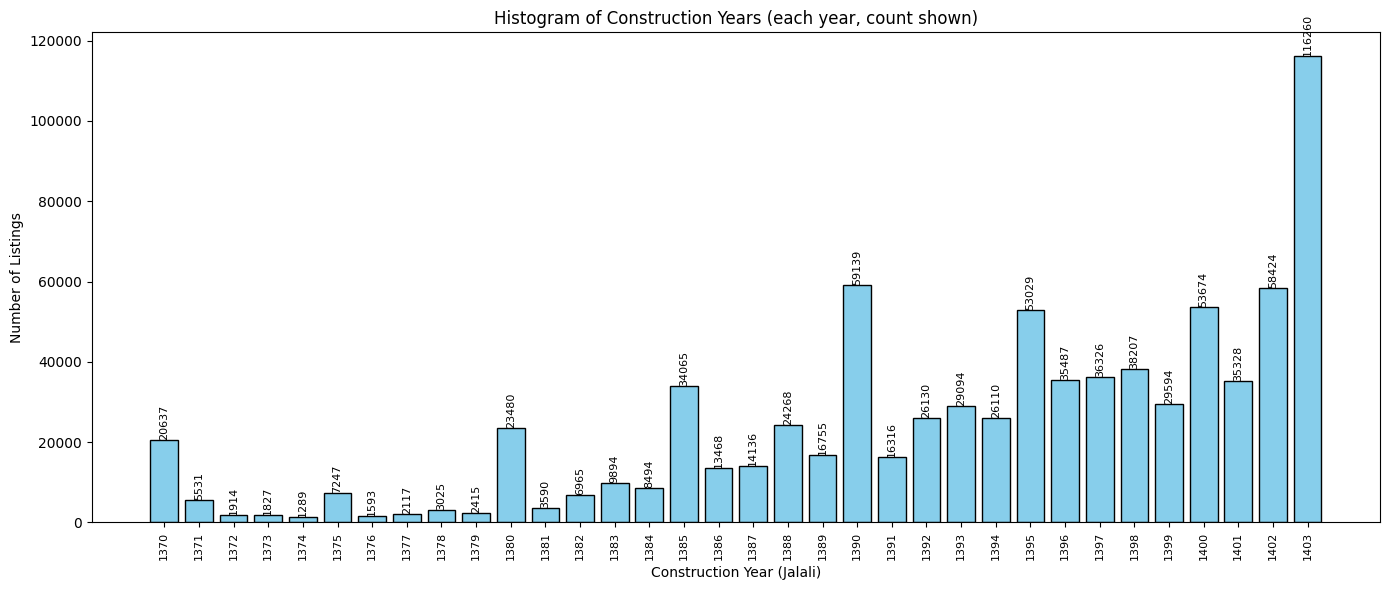

In [11]:

#2
def persian_to_english_number(persian_num):
    if pd.isna(persian_num):
        return np.nan
    num_str = str(persian_num)
    persian_digits = '۰۱۲۳۴۵۶۷۸۹'
    english_digits = '0123456789'
    translation_table = str.maketrans(persian_digits, english_digits)
    english_num = num_str.translate(translation_table)
    english_num = re.sub(r'[^\d]', '', english_num)
    try:
        return int(english_num)
    except ValueError:
        return np.nan

df = Drive_df.copy()

df['construction_year_clean'] = df['construction_year'].apply(persian_to_english_number)
df = df.dropna(subset=['construction_year_clean'])
df['construction_year_clean'] = df['construction_year_clean'].astype(int)

df_hist = df[(df['construction_year_clean'] >= 1300) & (df['construction_year_clean'] <= 1500)].copy()

counts = df_hist['construction_year_clean'].value_counts().sort_index()

years = counts.index.tolist()
values = counts.values.tolist()

plt.figure(figsize=(14,6))
bars = plt.bar(years, values, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.xlabel('Construction Year (Jalali)')
plt.ylabel('Number of Listings')
plt.title('Histogram of Construction Years (each year, count shown)')
plt.xticks(years, rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


In [22]:
#3

df = Drive_df.copy()


cat2_unique_values = df['cat2_slug'].unique()
cat3_unique_values = df['cat3_slug'].unique()
unique_values = df['created_at_month'].unique()

print("Unique values in 'cat2_slug':")
print(cat2_unique_values)
print("\nUnique values in 'cat3_slug':")
print(cat3_unique_values)
print("\nUnique values in 'created_at_month':")
print(unique_values)

Unique values in 'cat2_slug':
['temporary-rent' 'residential-sell' 'residential-rent' 'commercial-rent'
 'commercial-sell' 'real-estate-services']

Unique values in 'cat3_slug':
['villa' 'apartment-sell' 'apartment-rent' 'office-rent' 'shop-sell'
 'plot-old' 'house-villa-sell' 'house-villa-rent' 'shop-rent'
 'industry-agriculture-business-rent' 'office-sell'
 'industry-agriculture-business-sell' 'presell' 'suite-apartment'
 'partnership' 'workspace' nan]

Unique values in 'created_at_month':
['2024-08-01 00:00:00' '2024-05-01 00:00:00' '2024-10-01 00:00:00'
 '2024-06-01 00:00:00' '2024-09-01 00:00:00' '2024-11-01 00:00:00'
 '2024-07-01 00:00:00' '2024-12-01 00:00:00' '2024-04-01 00:00:00'
 '2025-01-01 00:00:00' '2024-03-01 00:00:00' '2024-01-01 00:00:00'
 '2025-02-01 00:00:00' '2024-02-01 00:00:00' '2023-11-01 00:00:00'
 '2023-09-01 00:00:00' '2023-10-01 00:00:00' '2023-07-01 00:00:00'
 '2023-12-01 00:00:00' '2023-05-01 00:00:00' '2023-03-01 00:00:00'
 '2023-04-01 00:00:00' '2023-06-01

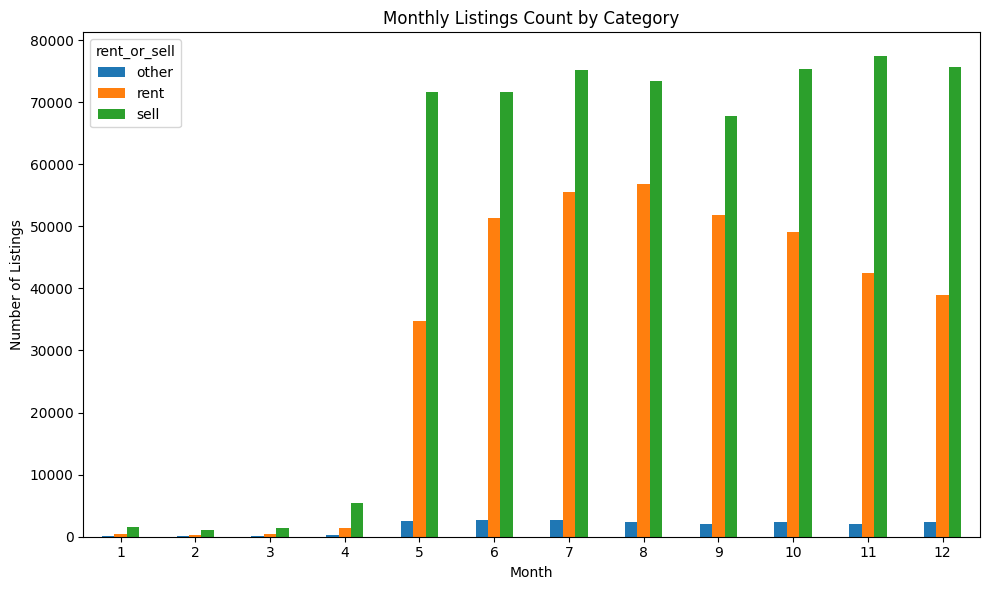

In [18]:
#3

df = Drive_df.copy()


df['created_at_month'] = pd.to_datetime(df['created_at_month'], errors='coerce')

df['month'] = df['created_at_month'].dt.month

df['rent_or_sell'] = df['cat2_slug'].apply(lambda x: 'rent' if 'rent' in str(x) else ('sell' if 'sell' in str(x) else 'other'))

monthly_counts = df.groupby(['month', 'rent_or_sell']).size().unstack(fill_value=0).sort_index()


monthly_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Monthly Listings Count by Category')
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.tight_layout()


plt.show()


In [21]:
#3


df = Drive_df.copy()


df['created_at_month'] = pd.to_datetime(df['created_at_month'], errors='coerce')


df['month'] = df['created_at_month'].dt.month


missing_dates = df[df['created_at_month'].isna()]
print(f"Rows with missing or invalid 'created_at_month': {len(missing_dates)}")


Rows with missing or invalid 'created_at_month': 0


In [2]:
#5

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

world = world.rename(columns={c: c.lower() for c in world.columns})

iran = world[world['name'].str.lower().isin([
    "iran", "iran (islamic republic of)", "iran, islamic republic of"
])].copy()

if iran.empty:
    
    iran = world[world['name'].str.lower().str.contains("iran")].copy()

if iran.empty:
    raise RuntimeError("Could not find Iran in world polygons.")

iran_geom = iran.unary_union

print("Iran polygon loaded from URL, number of country entries:", len(iran))


Iran polygon loaded from URL, number of country entries: 1


/var/folders/l1/pklr4qxn6hq3qpmf7nfxf37h0000gn/T/ipykernel_2096/3061549992.py:24: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  iran_geom = iran.unary_union


In [4]:
#5

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)


print("World polygons columns:", world.columns.tolist())


candidate_name_cols = ['name','NAME','ADMIN','admin','sovereignt','sovereignty','formal_en','formal_en','common']


name_col = None
for c in candidate_name_cols:
    if c in world.columns:
       
        if world[c].astype(str).str.lower().str.contains("iran").any():
            name_col = c
            break

if name_col is None:
    raise RuntimeError("Could not find country-name column with 'iran' in it among candidates.")

print("Using country name column:", name_col)

iran = world[world[name_col].astype(str).str.lower().str.contains("iran")].copy()

if iran.empty:
    raise RuntimeError("Could not isolate Iran polygon even with name column '{}'".format(name_col))


iran_geom = iran.unary_union  

print("Iran polygon loaded using column:", name_col)

test_point = Point(51.4, 35.7) 
print("Is test point inside Iran polygon?", iran_geom.contains(test_point))


World polygons columns: ['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO', 'ADM0_A

/var/folders/l1/pklr4qxn6hq3qpmf7nfxf37h0000gn/T/ipykernel_2096/1863063291.py:35: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  iran_geom = iran.unary_union  # or iran.geometry.unary_union


In [5]:
#5

CSV_PATH = "merged_divar_with_city.csv"
LAT = "location_latitude"
LON = "location_longitude"
MAX_POINTS = 200000


IR_LAT_MIN, IR_LAT_MAX = 24.5, 41.0
IR_LON_MIN, IR_LON_MAX = 43.0, 64.5


persian_digits = '۰۱۲۳۴۵۶۷۸۹'
arabic_digits  = '٠١٢٣٤٥٦٧٨٩'
english_digits = '0123456789'
trans_table = str.maketrans(persian_digits + arabic_digits, english_digits * 2)
ZW = '\u200c\u200b\uFEFF'

def normalize_num(s):
    if pd.isna(s):
        return None
    s = str(s).strip()
    for z in ZW:
        s = s.replace(z, '')
    s = s.translate(trans_table)
    s = s.replace('٫', '.').replace('٬', '.').replace('،', '.').replace(',', '.')
    return s

def parse_coord(raw):
    if pd.isna(raw):
        return np.nan
    s = normalize_num(raw)
    if not s:
        return np.nan
    # try direct float
    try:
        if re.fullmatch(r'[-+]?\d*\.\d+|[-+]?\d+', s):
            return float(s)
    except:
        pass
    # find first numeric token
    m = re.search(r'[-+]?\d*\.\d+|[-+]?\d+', s)
    if m:
        try:
            return float(m.group(0))
        except:
            pass
   
    nums = re.findall(r'[-+]?\d*\.\d+|[-+]?\d+', s)
    if nums:
        if len(nums) >= 3:
            deg = float(nums[0])
            mins = float(nums[1])
            secs = float(nums[2])
            dd = abs(deg) + mins/60.0 + secs/3600.0
            if str(nums[0]).strip().startswith('-'):
                dd = -dd
            return dd
        elif len(nums) == 2:
            deg = float(nums[0])
            mins = float(nums[1])
            dd = abs(deg) + mins/60.0
            if str(nums[0]).strip().startswith('-'):
                dd = -dd
            return dd
        else:
            try:
                return float(nums[0])
            except:
                pass
    return np.nan


url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
iran = world[world['NAME'].str.lower().str.contains("iran")].copy()
if iran.empty:
    raise RuntimeError("Could not load Iran polygon.")
iran_geom = iran.unary_union  


df = pd.read_csv(CSV_PATH, encoding='utf-8-sig', low_memory=False)
print("Rows loaded:", len(df))


df['_lat'] = df[LAT].apply(parse_coord)
df['_lon'] = df[LON].apply(parse_coord)


df = df[df['_lat'].notna() & df['_lon'].notna()].copy()
print("Rows with numeric coords:", len(df))


def fix_scale(r):
    lat, lon = r['_lat'], r['_lon']
    if (IR_LAT_MIN <= lat <= IR_LAT_MAX) and (IR_LON_MIN <= lon <= IR_LON_MAX):
        return r
    for factor in (1e6, 1e5, 1e3):
        lat2 = lat / factor
        lon2 = lon / factor
        if (IR_LAT_MIN <= lat2 <= IR_LAT_MAX) and (IR_LON_MIN <= lon2 <= IR_LON_MAX):
            r['_lat'], r['_lon'] = lat2, lon2
            return r
    return r

df = df.apply(fix_scale, axis=1)


def fix_swap(r):
    lat, lon = r['_lat'], r['_lon']
    try:
        if iran_geom.contains(Point(lon, lat)):
            return r
    except:
        pass
    try:
        if iran_geom.contains(Point(lat, lon)):
            r['_lat'], r['_lon'] = lon, lat
            return r
    except:
        pass
    return r

df = df.apply(fix_swap, axis=1)


valid_df = df[df.apply(lambda row: iran_geom.contains(Point(row['_lon'], row['_lat'])), axis=1)].copy()
print("Rows inside Iran after cleaning:", len(valid_df))


if len(valid_df) > MAX_POINTS:
    plot_df = valid_df.sample(n=MAX_POINTS, random_state=42)
else:
    plot_df = valid_df

heat_points = plot_df[['_lat','_lon']].values.tolist()


center_lat = float(plot_df['_lat'].median())
center_lon = float(plot_df['_lon'].median())

m = folium.Map(location=[center_lat, center_lon], zoom_start=5, tiles="CartoDB positron")

HeatMap(heat_points, min_opacity=0.4, radius=8, blur=12, max_zoom=11).add_to(m)

outfile = "iran_heatmap_cleaned_final.html"
m.save(outfile)
display(m)
print("Saved cleaned heatmap:", outfile)


/var/folders/l1/pklr4qxn6hq3qpmf7nfxf37h0000gn/T/ipykernel_2096/2079719251.py:85: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  iran_geom = iran.unary_union  # still works though deprecated


Rows loaded: 1000000
Rows with numeric coords: 655608
Rows inside Iran after cleaning: 649678


Saved cleaned heatmap: iran_heatmap_cleaned_final.html


In [ ]:
#pip install folium

In [30]:
#7
df = Drive_df.copy()
price_values = df['price_value'].unique()
price_mode_values = df['price_mode'].unique()

print("Unique values in 'price_value':")
print(price_values)



Unique values in 'price_value':
[           nan 8.50000000e+09 5.75000000e+09 ... 9.71100000e+09
 2.37300000e+09 1.24665822e+08]
Unique values in 'price_mode':
[nan 'مقطوع' 'مجانی' 'توافقی']


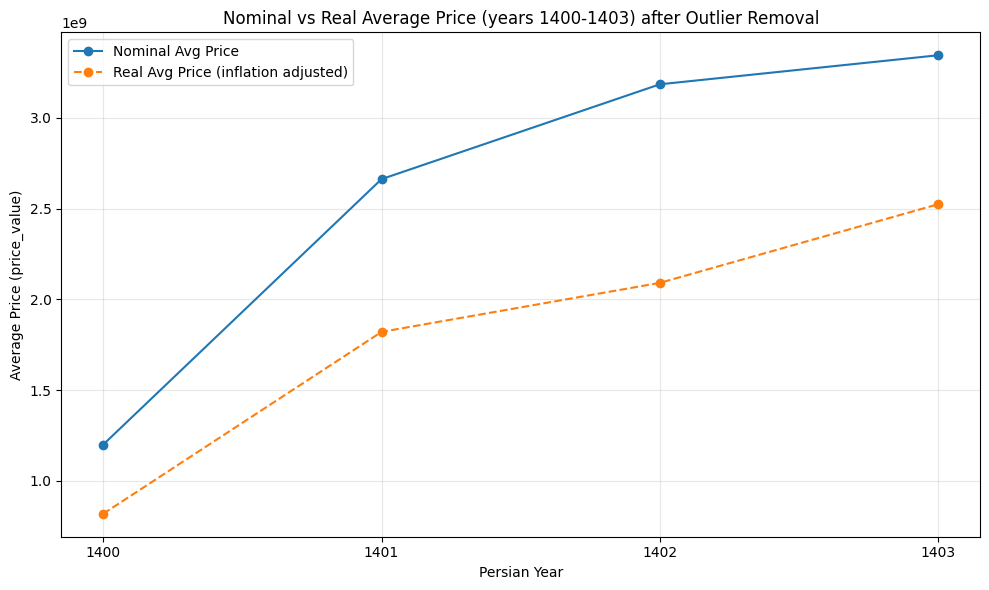

In [33]:
#7

df = Drive_df.copy()


df['created_at_month'] = pd.to_datetime(df['created_at_month'], errors='coerce')
df = df.dropna(subset=['created_at_month'])


df['year_gregorian'] = df['created_at_month'].dt.year.astype(int)
df['persian_year'] = df['year_gregorian'] - 621


df = df[df['persian_year'].isin([1400, 1401, 1402, 1403])].copy()


df['price_value'] = pd.to_numeric(df['price_value'], errors='coerce')
df = df.dropna(subset=['price_value'])
df = df[df['price_value'] > 0]


q1 = df['price_value'].quantile(0.25)
q3 = df['price_value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_no_out = df[(df['price_value'] >= lower_bound) & (df['price_value'] <= upper_bound)].copy()


nominal_avg = df_no_out.groupby('persian_year')['price_value'].mean()


inflation = {
    1400: 0.465,
    1401: 0.462,
    1402: 0.523,
    1403: 0.325
}


real_avg = nominal_avg.copy()
for yr in real_avg.index:
    rate = inflation.get(yr, None)
    if rate is not None:
        real_avg.loc[yr] = nominal_avg.loc[yr] / (1 + rate)
    else:
        real_avg.loc[yr] = np.nan


plt.figure(figsize=(10,6))
yrs = sorted(real_avg.index)
plt.plot(yrs, [nominal_avg.loc[y] for y in yrs], marker='o', linestyle='-', label='Nominal Avg Price')
plt.plot(yrs, [real_avg.loc[y] for y in yrs], marker='o', linestyle='--', label='Real Avg Price (inflation adjusted)')
plt.title('Nominal vs Real Average Price (years 1400-1403) after Outlier Removal')
plt.xlabel('Persian Year')
plt.xticks(yrs)
plt.ylabel('Average Price (price_value)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Listings with ALL 5 amenities: 75
Listings with ANY of the amenities: 615416


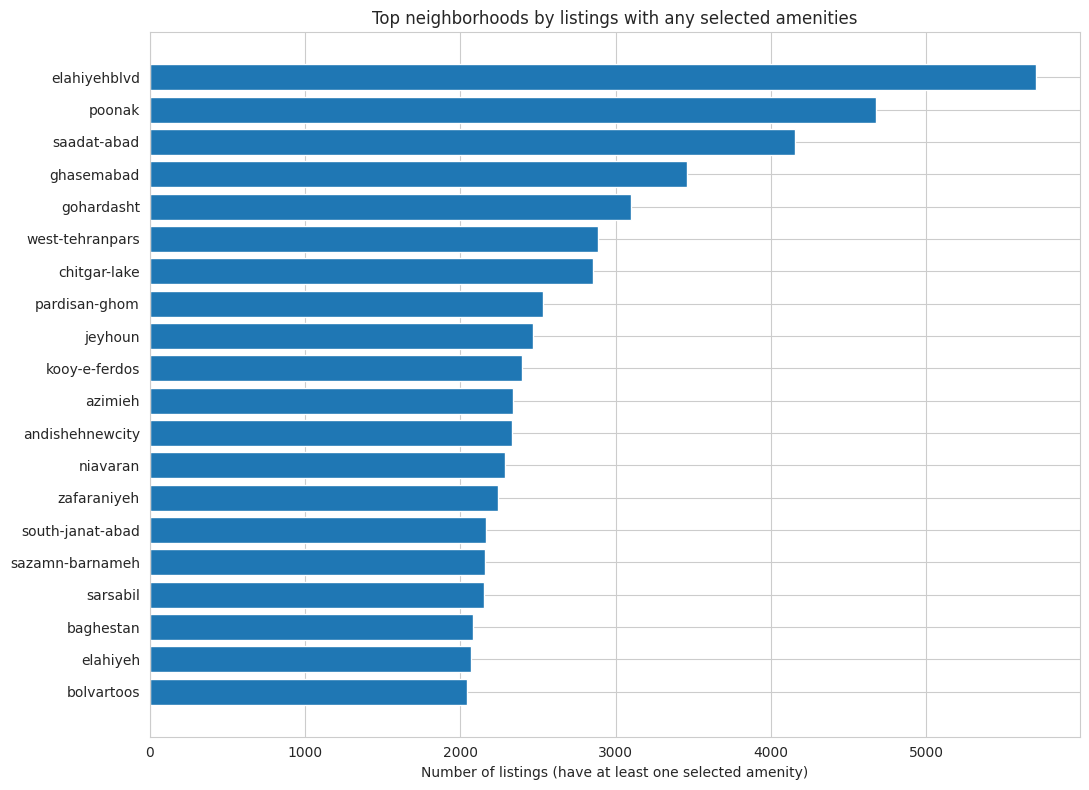

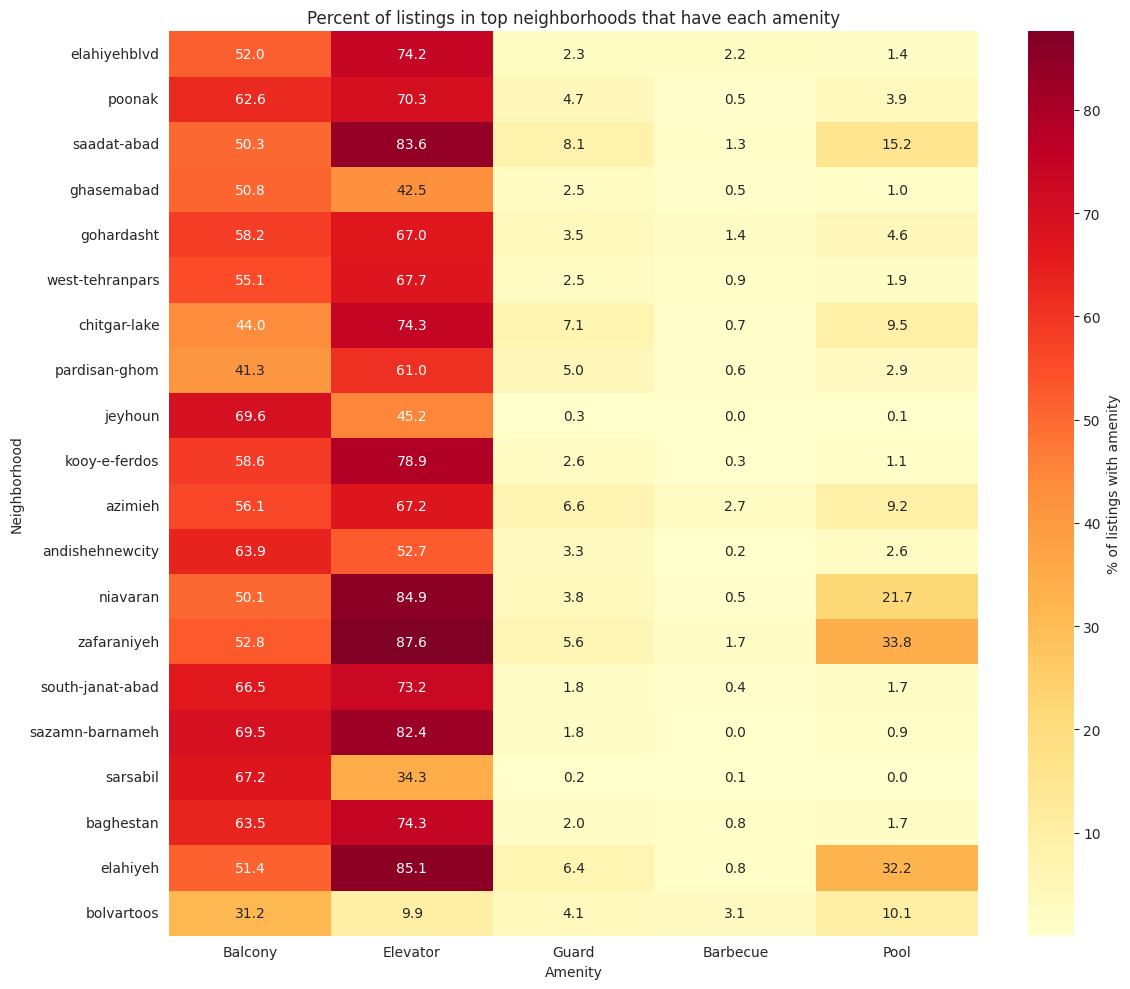


Top neighborhoods by ANY-amenity counts:
neighborhood_slug  count_any_amenities
     elahiyehblvd                 5705
           poonak                 4677
      saadat-abad                 4153
       ghasemabad                 3460
       gohardasht                 3099
  west-tehranpars                 2886
     chitgar-lake                 2857
    pardisan-ghom                 2530
          jeyhoun                 2469
    kooy-e-ferdos                 2398
          azimieh                 2342
  andishehnewcity                 2330
         niavaran                 2287
      zafaraniyeh                 2242
 south-janat-abad                 2163
  sazamn-barnameh                 2160
         sarsabil                 2152
        baghestan                 2083
         elahiyeh                 2067
       bolvartoos                 2040


In [8]:
#9
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'


if 'merged_df' in globals():
    df = merged_df.copy()
else:
    df = pd.read_csv("merged_divar_with_city.csv", encoding='utf-8-sig', low_memory=False)


if 'neighborhood_slug' not in df.columns or df['neighborhood_slug'].isna().all():
    df['neighborhood_slug'] = df.get('city_slug', '').astype(str)


amen_cols_expected = {
    'balcony': 'has_balcony',
    'elevator': 'has_elevator',
    'guard': 'has_security_guard',
    'barbecue': 'has_barbecue',
    'pool': 'has_pool'
}


eng_keywords = {
    'balcony': ['balcony'],
    'elevator': ['elevator', 'lift'],
    'guard': ['guard', 'security', 'doorman', 'concierge'],
    'barbecue': ['barbecue', 'bbq', 'barbeque'],
    'pool': ['pool', 'swimming pool']
}
persian_keywords = {
    'balcony': ['بالکن'],
    'elevator': ['آسانسور'],
    'guard': ['نگهبان'],
    'barbecue': ['باربیکیو', 'باربکیو'],
    'pool': ['استخر']
}

text_cols = [c for c in ['description', 'title'] if c in df.columns]


def contains_any_keyword(text, kws_eng, kws_fa):
    if pd.isna(text):
        return False
    s = str(text).lower()
  
    for kw in kws_eng:
        if re.search(r'\b' + re.escape(kw.lower()) + r'\b', s):
            return True
  
    for kw in kws_fa:
        if kw in s:
            return True
    return False


for key in amen_cols_expected.keys():
    eng_kws = eng_keywords.get(key, [])
    fa_kws = persian_keywords.get(key, [])

    if text_cols:
        df[f'{key}_text'] = df[text_cols].apply(
            lambda row: any(contains_any_keyword(v, eng_kws, fa_kws) for v in row),
            axis=1
        )
    else:
        df[f'{key}_text'] = False


def to_bool_val(x):
    if pd.isna(x):
        return False
    if isinstance(x, (int, float, np.integer, np.floating)):
        return float(x) > 0
    s = str(x).strip().lower()
    truthy = {'1','true','t','yes','y','دارد','بله','وجود','yes.'}
    falsy = {'0','false','f','no','n','ندارد','خیر','none','nan',''}
    if s in truthy:
        return True
    if s in falsy:
        return False
    
    if any(w in s for w in ['balcony','balcon','balcón','بالکن','آسانسور','نگهبان','استخر','باربیکیو','barbecue','pool','lift','elevator','guard','security']):
        return True
    return False


final_bool_cols = []
for key, colname in amen_cols_expected.items():
    text_col = f'{key}_text'
    if colname in df.columns:
        df[colname + '_bool'] = df[colname].map(to_bool_val)
        # final is either explicit bool OR text-detected
        df[key + '_bool'] = df[colname + '_bool'] | df[text_col].astype(bool)
    else:
        df[key + '_bool'] = df[text_col].astype(bool)
    final_bool_cols.append(key + '_bool')


df['amenities_count'] = df[final_bool_cols].sum(axis=1)


all_mask = df[final_bool_cols].all(axis=1)
any_mask = df[final_bool_cols].any(axis=1)

print("Listings with ALL 5 amenities:", int(all_mask.sum()))
print("Listings with ANY of the amenities:", int(any_mask.sum()))


neigh_total = df.groupby('neighborhood_slug').size().rename('total_listings').reset_index()
neigh_amen_counts = df.groupby('neighborhood_slug')[final_bool_cols].sum().reset_index()

rename_map = {f'{k}_bool': f'has_{k}' for k in amen_cols_expected.keys()}
neigh_amen_counts = neigh_amen_counts.rename(columns=rename_map)

neigh_stats = neigh_total.merge(neigh_amen_counts, on='neighborhood_slug', how='left')

for k in amen_cols_expected.keys():
    col = f'has_{k}'
    pct = col + '_pct'
    neigh_stats[pct] = 100.0 * neigh_stats[col] / neigh_stats['total_listings']


neigh_mean_amenities = df.groupby('neighborhood_slug')['amenities_count'].mean().rename('mean_amenities').reset_index()
neigh_stats = neigh_stats.merge(neigh_mean_amenities, on='neighborhood_slug', how='left')

neigh_stats.to_csv("neighborhood_amenities_summary.csv", index=False, encoding='utf-8-sig')


top_n = 20


neigh_any_counts = df[any_mask].groupby('neighborhood_slug').size().rename('count_any_amenities').reset_index().sort_values('count_any_amenities', ascending=False)
top_any = neigh_any_counts.head(top_n)

plt.figure(figsize=(11,8))
plt.barh(top_any['neighborhood_slug'], top_any['count_any_amenities'], color='tab:blue')
plt.gca().invert_yaxis()
plt.xlabel('Number of listings (have at least one selected amenity)')
plt.title('Top neighborhoods by listings with any selected amenities')
plt.tight_layout()
plt.show()


top_neighs_for_heat = top_any['neighborhood_slug'].tolist()
if len(top_neighs_for_heat) < top_n:
    additional = neigh_stats.sort_values('mean_amenities', ascending=False)['neighborhood_slug'].tolist()
    for nbh in additional:
        if nbh not in top_neighs_for_heat:
            top_neighs_for_heat.append(nbh)
        if len(top_neighs_for_heat) >= top_n:
            break

heat_df = neigh_stats.set_index('neighborhood_slug').loc[top_neighs_for_heat]
pct_cols = [f'has_{k}_pct' if f'has_{k}_pct' in heat_df.columns else f'has_{k}_pct' for k in amen_cols_expected.keys()]

pct_cols = [f'has_{k}_pct' for k in amen_cols_expected.keys()]
heat_matrix = heat_df[pct_cols].fillna(0)
heat_matrix.columns = [c.replace('has_','').replace('_pct','').replace('_',' ').title() for c in heat_matrix.columns]

plt.figure(figsize=(12,10))
sns.heatmap(heat_matrix, annot=True, fmt=".1f", cmap='YlOrRd', cbar_kws={'label':'% of listings with amenity'})
plt.title('Percent of listings in top neighborhoods that have each amenity')
plt.ylabel('Neighborhood')
plt.xlabel('Amenity')
plt.tight_layout()
plt.show()


print("\nTop neighborhoods by ANY-amenity counts:")
print(top_any.head(20).to_string(index=False))


In [10]:
df = pd.read_csv("merged_divar_with_city.csv", encoding='utf-8-sig', low_memory=False) 

In [11]:
df.head()

Unnamed: 0         cat2_slug       cat3_slug city_slug neighborhood_slug  \
0           0    temporary-rent           villa     karaj         mehrshahr   
1           1  residential-sell  apartment-sell    tehran           gholhak   
2           2  residential-rent  apartment-rent    tehran             tohid   
3           3   commercial-rent     office-rent    tehran          elahiyeh   
4           4  residential-sell  apartment-sell   mashhad          emamreza   

      created_at_month    user_type  \
0  2024-08-01 00:00:00  مشاور املاک   
1  2024-05-01 00:00:00  مشاور املاک   
2  2024-10-01 00:00:00          NaN   
3  2024-06-01 00:00:00          NaN   
4  2024-05-01 00:00:00  مشاور املاک   

                                         description  \
0  ۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...   
1  دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...   
2                                    تخلیه پایان ماه   
3  فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...   
4  هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...   

                                              title rent_mode  ...  \
0  باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه       NaN  ...   
1                           ۶۰ متر قلهک فول امکانات       NaN  ...   
2                          آپارتمان ۳ خوابه ۱۳۲ متر     مقطوع  ...   
3           فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری     مقطوع  ...   
4                  ۱۱۵ متری/شمالی رو به آفتاب/اکبری       NaN  ...   

   rent_price_on_regular_days rent_price_on_special_days  \
0                   1500000.0               3.500000e+09   
1                         NaN                        NaN   
2                         NaN                        NaN   
3                         NaN                        NaN   
4                         NaN                        NaN   

  rent_price_at_weekends location_latitude  location_longitude  \
0              3500000.0         35.811684           50.936600   
1                    NaN               NaN                 NaN   
2                    NaN         35.703865           51.373459   
3                    NaN               NaN                 NaN   
4                    NaN               NaN                 NaN   

  location_radius  city_slug_norm  نام شهر دسته‌بندی  _merge  
0           500.0           karaj    karaj  کلان‌شهر    both  
1           500.0          tehran   tehran  کلان‌شهر    both  
2             NaN          tehran   tehran  کلان‌شهر    both  
3             NaN          tehran   tehran  کلان‌شهر    both  
4             NaN         mashhad  mashhad  کلان‌شهر    both  

[5 rows x 65 columns]

In [12]:
#1

CSV_PATH = "merged_divar_with_city.csv"

df = pd.read_csv(CSV_PATH, encoding='utf-8-sig', low_memory=False)


candidates = ['building_size']
cols_lower = {c.lower(): c for c in df.columns}
building_col = None
for cand in candidates:
    if cand.lower() in cols_lower:
        building_col = cols_lower[cand.lower()]
        break
if building_col is None:
  
    for c in df.columns:
        if any(tok in c.lower() for tok in ['building','زیربنا','متراژ','مساحت','area','size','land']):
            building_col = c
            break
if building_col is None:
    raise RuntimeError("No building/area column found. Edit candidates list or provide column name.")
print("Using building column:", building_col)


if 'دسته‌بندی' in df.columns:
    class_col = 'دسته‌بندی'
elif 'city_slug_norm' in df.columns:
    class_col = 'city_slug_norm'
elif 'city_slug' in df.columns:
    class_col = 'city_slug'
else:
    class_col = None
print("Using classification column:", class_col)


def map_group(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()
    s = s.replace('‌','').replace('-','').replace('_','').replace(' ','')  
    if 'کلان' in s or 'کلانشهر' in s or 'metropolitan' in s or 'metro' in s:
        return 'Metro'
    if 'شهرکوچک' in s or 'کوچک' in s or 'small' in s or 'town' in s or 'village' in s or 'روستا' in s:
        return 'Small'
    return np.nan

if class_col is not None:
    df['city_group'] = df[class_col].apply(map_group)
else:
    df['city_group'] = np.nan


if df['city_group'].isna().mean() > 0.4:
    big_cities = ['tehran','mashhad','tabriz','isfahan','karaj','shiraz','ahvaz','qom','rasht','kermanshah'] 
    if 'city_slug_norm' in df.columns:
        df['city_group'] = df['city_slug_norm'].astype(str).str.lower().apply(
            lambda x: 'Metro' if any(b in x for b in big_cities) else ('Small' if x.strip() else np.nan)
        )
    elif 'city_slug' in df.columns:
        df['city_group'] = df['city_slug'].astype(str).str.lower().apply(
            lambda x: 'Metro' if any(b in x for b in big_cities) else ('Small' if x.strip() else np.nan)
        )


df['building_area'] = pd.to_numeric(df[building_col], errors='coerce')
df_clean = df[df['building_area'].notna() & (df['building_area'] > 0)].copy()
df_clean = df_clean[df_clean['city_group'].isin(['Metro','Small'])].copy()

n_total = len(df_clean)
print("Rows after filtering positive area and group mapping:", n_total)
print("Counts by group:\n", df_clean['city_group'].value_counts())

if df_clean['city_group'].nunique() < 2:
    raise RuntimeError("Not enough groups (Metro and Small) found after mapping. Check classification column.")


low_q, high_q = df_clean['building_area'].quantile(0.005), df_clean['building_area'].quantile(0.995)
df_trim = df_clean[(df_clean['building_area'] >= low_q) & (df_clean['building_area'] <= high_q)].copy()
print(f"Rows after trimming extremes ({low_q:.2f} to {high_q:.2f}):", len(df_trim))


summary = df_trim.groupby('city_group')['building_area'].agg(['count','mean','median','std']).round(2)
print("\nSummary statistics (building area) by group:\n", summary)

metro_vals = df_trim[df_trim['city_group']=='Metro']['building_area'].values
small_vals = df_trim[df_trim['city_group']=='Small']['building_area'].values


t_stat, p_two_sided = stats.ttest_ind(metro_vals, small_vals, equal_var=False, nan_policy='omit')
mean_metro = np.nanmean(metro_vals)
mean_small = np.nanmean(small_vals)
if np.isnan(t_stat):
    raise RuntimeError("t-test returned NaN (insufficient or constant data).")
if t_stat < 0:
    p_directional = p_two_sided / 2
else:
    p_directional = 1 - p_two_sided / 2


try:
    u_stat, p_mw_two = stats.mannwhitneyu(metro_vals, small_vals, alternative='two-sided')
except Exception:
    u_stat, p_mw_two = (np.nan, np.nan)


def cohens_d(x,y):
    nx, ny = len(x), len(y)
    mx, my = np.mean(x), np.mean(y)
    sx, sy = np.std(x, ddof=1), np.std(y, ddof=1)
    pooled = np.sqrt(((nx-1)*sx*sx + (ny-1)*sy*sy) / (nx+ny-2)) if nx+ny-2>0 else np.nan
    return (mx - my) / pooled if pooled>0 else np.nan

d = cohens_d(metro_vals, small_vals)


print("\nMeans: Metro = {:.2f}, Small = {:.2f}".format(mean_metro, mean_small))
print("Welch t-statistic = {:.4f}, two-sided p = {:.4e}".format(t_stat, p_two_sided))
print("Directional test (H1: mean(Metro) < mean(Small)) p = {:.4e}".format(p_directional))
print("Mann-Whitney U (two-sided) p = {:.4e}".format(p_mw_two if not np.isnan(p_mw_two) else np.nan))
print("Cohen's d (effect size, Metro - Small) = {:.4f}".format(d if not np.isnan(d) else np.nan))


alpha = 0.05
print("\nInterpretation (alpha = 0.05):")
if p_directional < alpha:
    print(f"  - Reject H0 in favor of H1: evidence that mean building area in metropolitan cities is SMALLER than in small cities (p = {p_directional:.4e}).")
else:
    print(f"  - Fail to reject H0: no strong evidence that mean building area in metropolitan cities is smaller than in small cities (p = {p_directional:.4e}).")

if p_mw_two < alpha:
    print(f"  - Mann-Whitney test also indicates a difference between distributions (p = {p_mw_two:.4e}).")
else:
    print(f"  - Mann-Whitney test does not indicate a significant difference (p = {p_mw_two:.4e}).")


Using building column: building_size
Using classification column: دسته‌بندی
Rows after filtering positive area and group mapping: 944109
Counts by group:
 city_group
Small    488988
Metro    455121
Name: count, dtype: int64
Rows after trimming extremes (10.00 to 45000.00): 934940

Summary statistics (building area) by group:
              count    mean  median      std
city_group                                 
Metro       451607  216.49   100.0  1099.29
Small       483333  379.68   107.0  1851.68

Means: Metro = 216.49, Small = 379.68
Welch t-statistic = -52.2096, two-sided p = 0.0000e+00
Directional test (H1: mean(Metro) < mean(Small)) p = 0.0000e+00
Mann-Whitney U (two-sided) p = 0.0000e+00
Cohen's d (effect size, Metro - Small) = -0.1063

Interpretation (alpha = 0.05):
  - Reject H0 in favor of H1: evidence that mean building area in metropolitan cities is SMALLER than in small cities (p = 0.0000e+00).
  - Mann-Whitney test also indicates a difference between distributions (p = 0.

In [14]:
#3

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

CSV_PATH = "merged_divar_with_city.csv"
ALPHA = 0.05


df = pd.read_csv(CSV_PATH, encoding='utf-8-sig', low_memory=False)


if 'cat2_slug' in df.columns:
    comm_mask = df['cat2_slug'].astype(str).str.contains('commercial-sell', na=False, case=False)
    df_comm = df[comm_mask].copy()
else:

    df_comm = df[df['cat3_slug'].astype(str).str.contains('sell|shop|office', na=False, case=False)].copy()


if 'price_value' not in df_comm.columns:
    raise RuntimeError("price_value column not found in data.")

df_comm['price_value'] = pd.to_numeric(df_comm['price_value'], errors='coerce')
df_comm = df_comm[df_comm['price_value'].notna() & (df_comm['price_value'] > 0)].copy()


def to_bool(x):
    if pd.isna(x):
        return False
    if isinstance(x, (int, float, np.integer, np.floating)):
        return float(x) > 0
    s = str(x).strip().lower()
    truthy = {'1','true','t','yes','y','دارد','داره','بله','وجود'}
    falsy = {'0','false','f','no','n','ندارد','خیر','none','nan',''}
    if s in truthy:
        return True
    if s in falsy:
        return False
    if any(tok in s for tok in ['دارد','بله','has','yes','true','وجود']):
        return True
    return False

if 'has_business_deed' in df_comm.columns:
    df_comm['has_business_deed_bool'] = df_comm['has_business_deed'].map(to_bool)
else:
    df_comm['has_business_deed_bool'] = False


counts = df_comm['has_business_deed_bool'].value_counts(dropna=False)
print("Group counts (has_business_deed True / False):")
print(counts.to_string())


low_bound = df_comm['price_value'].quantile(0.005)
high_bound = df_comm['price_value'].quantile(0.995)
df_trim = df_comm[(df_comm['price_value'] >= low_bound) & (df_comm['price_value'] <= high_bound)].copy()

print(f"\nRows before trimming: {len(df_comm)}, after trimming: {len(df_trim)}")
print(f"Trimming bounds: {low_bound:.2f} to {high_bound:.2f}")


group_has = df_trim[df_trim['has_business_deed_bool'] == True]['price_value'].values
group_no  = df_trim[df_trim['has_business_deed_bool'] == False]['price_value'].values

n_has, n_no = len(group_has), len(group_no)
print(f"\nGroup sizes after trimming: has_deed = {n_has}, no_deed = {n_no}")

if n_has < 10 or n_no < 10:
    print("Warning: one or both groups have < 10 observations — test results may be unreliable.")


def desc(arr):
    return {
        'n': len(arr),
        'mean': np.nanmean(arr),
        'median': np.nanmedian(arr),
        'std': np.nanstd(arr, ddof=1),
        'min': np.nanmin(arr),
        'max': np.nanmax(arr)
    }

print("\nDescriptive stats (raw prices):")
print("Has deed:", desc(group_has))
print("No deed: ", desc(group_no))


group_has_log = np.log(group_has)
group_no_log  = np.log(group_no)

print("\nDescriptive stats (log prices):")
print("Has deed (log):", desc(group_has_log))
print("No deed  (log):", desc(group_no_log))


t_raw, p_raw_two = stats.ttest_ind(group_has, group_no, equal_var=False, nan_policy='omit')
try:
    u_raw, p_mw_raw = stats.mannwhitneyu(group_has, group_no, alternative='two-sided')
except Exception:
    u_raw, p_mw_raw = (np.nan, np.nan)


t_log, p_log_two = stats.ttest_ind(group_has_log, group_no_log, equal_var=False, nan_policy='omit')
try:
    u_log, p_mw_log = stats.mannwhitneyu(group_has_log, group_no_log, alternative='two-sided')
except Exception:
    u_log, p_mw_log = (np.nan, np.nan)


def cohens_d(x,y):
    nx, ny = len(x), len(y)
    mx, my = np.mean(x), np.mean(y)
    sx, sy = np.std(x, ddof=1), np.std(y, ddof=1)
    pooled = np.sqrt(((nx-1)*sx*sx + (ny-1)*sy*sy) / (nx+ny-2)) if nx+ny-2>0 else np.nan
    return (mx - my) / pooled if pooled>0 else np.nan

d_log = cohens_d(group_has_log, group_no_log)


print("\n--- Hypothesis test results ---")
print(f"Welch t-test (raw prices): t = {t_raw:.4f}, two-sided p = {p_raw_two:.4e}")
print(f"Mann-Whitney U (raw prices): U = {u_raw}, two-sided p = {p_mw_raw:.4e}")

print(f"\nWelch t-test (log prices): t = {t_log:.4f}, two-sided p = {p_log_two:.4e}")
print(f"Mann-Whitney U (log prices): U = {u_log}, two-sided p = {p_mw_log:.4e}")

print(f"\nMeans (raw): has_deed = {np.nanmean(group_has):.2f}, no_deed = {np.nanmean(group_no):.2f}")
print(f"Means (log): has_deed = {np.nanmean(group_has_log):.4f}, no_deed = {np.nanmean(group_no_log):.4f}")
print(f"Cohen's d (log-scale) = {d_log:.4f}")


direction = "higher" if np.nanmean(group_has_log) > np.nanmean(group_no_log) else "lower"
print(f"\nOn average (log-scale), commercial listings with a business deed have {direction} log-price than those without.")


print("\nInterpretation (alpha = {:.2f}):".format(ALPHA))
if p_log_two < ALPHA:
    print(" - On log-transformed prices, Welch's t-test indicates a statistically significant difference between groups (p = {:.4e}).".format(p_log_two))
else:
    print(" - On log-transformed prices, no statistically significant difference was found (p = {:.4e}).".format(p_log_two))

if p_mw_log < ALPHA:
    print(" - Mann-Whitney U on log-prices also indicates distributions differ (p = {:.4e}).".format(p_mw_log))
else:
    print(" - Mann-Whitney U on log-prices does not indicate a significant difference (p = {:.4e}).".format(p_mw_log))




Group counts (has_business_deed True / False):
has_business_deed_bool
False    17802
True     14127

Rows before trimming: 31929, after trimming: 31612
Trimming bounds: 100.00 to 300000000000.00

Group sizes after trimming: has_deed = 13982, no_deed = 17630

Descriptive stats (raw prices):
Has deed: {'n': 13982, 'mean': np.float64(10995983784.16514), 'median': np.float64(3810000000.0), 'std': np.float64(25125272720.48074), 'min': np.float64(100.0), 'max': np.float64(300000000000.0)}
No deed:  {'n': 17630, 'mean': np.float64(9437636783.37958), 'median': np.float64(3200000000.0), 'std': np.float64(22588706518.788437), 'min': np.float64(100.0), 'max': np.float64(300000000000.0)}

Descriptive stats (log prices):
Has deed (log): {'n': 13982, 'mean': np.float64(21.614126626250997), 'median': np.float64(22.060891581621824), 'std': np.float64(2.8343085636972982), 'min': np.float64(4.605170185988092), 'max': np.float64(26.42704831160261)}
No deed  (log): {'n': 17630, 'mean': np.float64(21.37816